# 09_eigenvalues_eigenvectors
##  Learning Objectives
- Understand what **eigenvalues** and **eigenvectors** are.
- Learn how to compute them for matrices.
- Explore **symmetric matrices** and their special properties.
- See **applications**, particularly in **PCA** for Data Science.

---

## Table of Contents 
1. [eigenvalues and eigenvectors](#eign)
   - [Characteristic Equation](#CharacteristicEquation)
   - [Python Example]
2. [Symmetric Matrices](#SymmetricMatrices)
3. [Applications](#Applications)
   - [Principal Component Analysis (PCA)]
   - [Data Compression](DataCompression)

### 1. eigenvalues and eigenvectors<a name='eign'></a>(#eign)
or a square matrix \(A\), a vector \(v \neq 0\) is an **eigenvector** if:

$$
A \mathbf{v} = \lambda \mathbf{v}
$$

Where:
-  $ \lambda $ = eigenvalue (scalar)
- $\mathbf{v}$ = eigenvector (direction unchanged by A)

---
#### Characteristic Equation<a name='CharacteristicEquation'></a>
Eigenvalues are found by solving:

$$
\det(A - \lambda I) = 0
$$

- $I$ = identity matrix  
- Solve for $\lambda$ → gives all eigenvalues  
- Then solve $ (A - \lambda I)v = 0 $ for eigenvectors

---
#### Python Example:

In [16]:
import numpy as np
A = np.array([[4, 2],
             [1, 3]])
#Compute eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(A)

print("Eigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)

Eigenvalues: [5. 2.]
Eigenvectors:
 [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


### 2. Symmetric Matrices<a name='SymmetricMatrices'></a>
If $A = A^T$ (symmetric):

- All eigenvalues are real

- Eigenvectors are orthogonal

- Useful in PCA, SVD, and covariance matrices

In [21]:
B = np.array([[2, 1],
              [1, 2]])

eigvals, eigvecs = np.linalg.eig(B)
print("Eigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)
# eigenvectors are perpendicular to each other.

Eigenvalues: [3. 1.]
Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


### 3. Applications<a name='Applications'></a>

#### Principal Component Analysis (PCA)<a name='PCA'></a>

PCA finds **directions of maximum variance** in the data:

1. Center the data:  
$$
X_{\text{centered}} = X - \bar{X}
$$

2. Compute covariance matrix:  
$$
C = \frac{1}{n-1} X_{\text{centered}}^T X_{\text{centered}}
$$

3. Compute **eigenvalues and eigenvectors** of $C$:
$$
C v_i = \lambda_i v_i
$$

- $v_i$ = principal component direction  
- $\lambda_i$ = variance along that direction  

4. Project data onto top-k components:
$$
Y = X_{\text{centered}} V_k
$$
Where $V_k$ contains tpression](DataCompression)

In [28]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample 2D dataset
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0]])

# Center the data
X_centered = X - X.mean(axis=0)

# PCA using scikit-learn
pca = PCA(n_components=2)
pca.fit(X_centered)

print("Principal Components (Eigenvectors):\n", pca.components_)
print("Explained Variance (Eigenvalues):\n", pca.explained_variance_)

# Transform data to principal component space
X_pca = pca.transform(X_centered)
print("Projected Data:\n", X_pca)

Principal Components (Eigenvectors):
 [[-0.72474155 -0.68902082]
 [-0.68902082  0.72474155]]
Explained Variance (Eigenvalues):
 [1.73707382 0.05392618]
Projected Data:
 [[-0.44362444 -0.20099093]
 [ 2.17719404 -0.05500992]
 [-0.57071239  0.36808609]
 [ 0.12902465  0.06747325]
 [-1.29188186 -0.17955849]]


#### Data Compression<a name='DataCompression'></a>
Data compression using PCA involves:

1. Compute **principal components** (eigenvectors of covariance matrix).  
2. Select top-$k$ components capturing most variance.  
3. Project data onto top-$k$ components:  

$$
Y = X_{\text{centered}} V_k
$$

- $X_{\text{centered}}$ = centered original data  
- $V_k$ = matrix of top-$k$ eigenvectors  

4. (Optional) Reconstruct approximate data in original space:

$$
X_{\text{approx}} = Y V_k^T + \bar{X}
$$

- Preserves maximum variance in reduced dimensions
- Useful for **compression, noise reduction, and visualization**

---

In [31]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample 2D dataset
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0]])

# Center the data
X_centered = X - X.mean(axis=0)

# Fit PCA, keep 1 component (compress to 1D)
pca = PCA(n_components=1)
X_compressed = pca.fit_transform(X_centered)

# Reconstruct approximate data
X_approx = pca.inverse_transform(X_compressed) + X.mean(axis=0)

# Print results
print("Compressed Data (1D):\n", X_compressed)
print("Reconstructed Data:\n", X_approx)

Compressed Data (1D):
 [[-0.44362444]
 [ 2.17719404]
 [-0.57071239]
 [ 0.12902465]
 [-1.29188186]]
Reconstructed Data:
 [[2.36151307 2.54566648]
 [0.46209702 0.73986797]
 [2.45361898 2.63323272]
 [1.94649048 2.15109933]
 [2.97628046 3.1301335 ]]


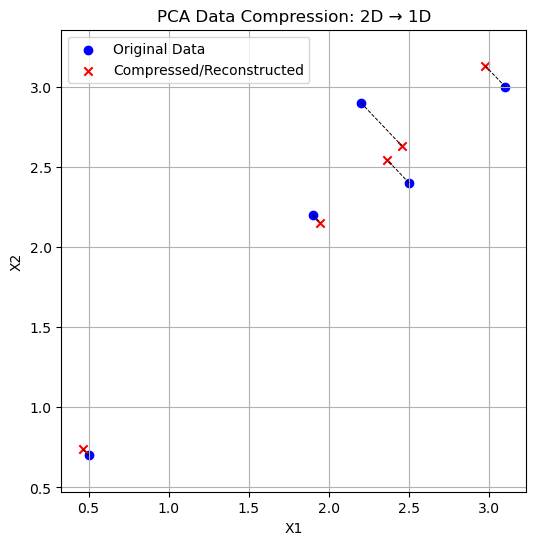

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], color='blue', label='Original Data')
plt.scatter(X_approx[:,0], X_approx[:,1], color='red', marker='x', label='Compressed/Reconstructed')
for i in range(len(X)):
    plt.plot([X[i,0], X_approx[i,0]], [X[i,1], X_approx[i,1]], 'k--', linewidth=0.7)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('PCA Data Compression: 2D → 1D')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()
